In [ ]:
%pip install accelerate -U

In [ ]:
! pip install pysentimiento

In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_excel("sample_data/labjurong.xlsx")  # Replace 'your_data.csv' with the actual path to your CSV file
import pandas as pd
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

# Load your DataFrame (replace 'your_data.csv' with your actual file path)
# Assuming you have a DataFrame named 'sample_df' with a 'text' column containing tweets.

# Initialize the SentimentAnalyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="en")

# Define a function to perform sentiment analysis and add labels to the DataFrame
def analyze_sentiment(text):
    result = sentiment_analyzer.predict(preprocess_tweet(text))
    return result

# Apply sentiment analysis to each row in the DataFrame
df['sentiment_pysentimiento'] = df['text'].apply(analyze_sentiment)

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('labeled_data_pysentimiento.csv', index=False)



In [ ]:
df

,text,Walking,Running,Team-Sports,Swimming,Water Sports,sentiment_pysentimiento
0,Just walking from home to the busstop and my e...,1,0,0,0,0,"AnalyzerOutput(output=NEG, probas={NEG: 0.863,..."
1,Shall turun pioneer and walk home.,1,0,0,0,0,"AnalyzerOutput(output=NEU, probas={NEU: 0.967,..."
2,Early in the morning 5am. Melinda &amp; Chee C...,1,0,0,0,0,"AnalyzerOutput(output=NEU, probas={NEU: 0.978,..."
3,Walking side by sideðŸ‘£ @ Siloso Beach https:...,1,0,0,0,0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,..."
4,Early morning walk â˜€ðŸŒ´ @ Bukit Batok Swimm...,1,0,0,0,0,"AnalyzerOutput(output=NEU, probas={NEU: 0.974,..."
...,...,...,...,...,...,...,...
245,Kayaking selection tomorrow,0,0,0,0,1,"AnalyzerOutput(output=NEU, probas={NEU: 0.945,..."
246,Kayaking ~ @ PA Water Venture Jurong Lake http...,0,0,0,0,1,"AnalyzerOutput(output=NEU, probas={NEU: 0.972,..."
247,Kayaking with Ventures 1st time kayaking is ...,0,0,0,0,1,"AnalyzerOutput(output=POS, probas={POS: 0.986,..."
248,burning all over &amp; dead tired but it was a...,0,0,0,0,1,"AnalyzerOutput(output=NEG, probas={NEG: 0.602,..."


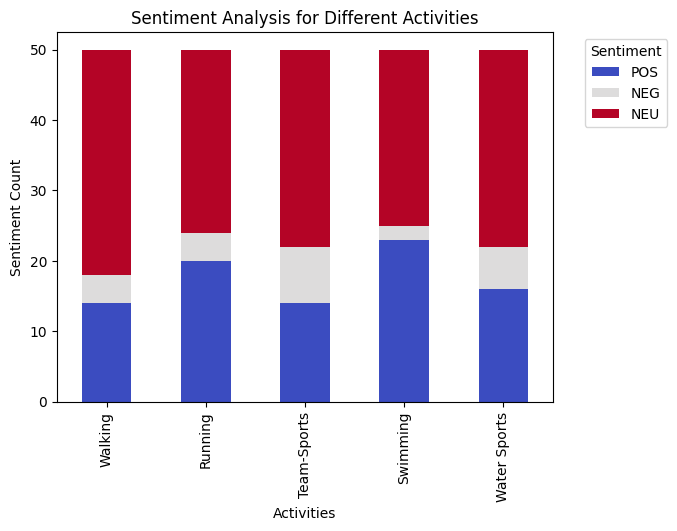

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer

# Read data from CSV file

# Define activities and corresponding columns
activities = ['Walking', 'Running', 'Team-Sports', 'Swimming', 'Water Sports']
sentiment_column = 'sentiment_pysentimiento'

# Create sentiment analyzer for Spanish
analyzer = create_analyzer(task="sentiment", lang="es")

# Initialize an empty dictionary to store sentiment results for each activity
sentiments_by_activity = {activity: {'POS': 0, 'NEG': 0, 'NEU': 0} for activity in activities}

# Iterate through each row and analyze sentiments for each activity
for index, row in df.iterrows():
    text = row['text']
    for activity in activities:
        label = row[activity]
        prediction = analyzer.predict(text).output

        # Increment sentiment count for the corresponding activity and label
        sentiments_by_activity[activity][prediction] += label  # Assuming labels are 0 or 1

# Convert sentiment counts to DataFrame for easy plotting
df_sentiments = pd.DataFrame(sentiments_by_activity).T

# Plotting the results in a bar graph
df_sentiments.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Activities')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis for Different Activities')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


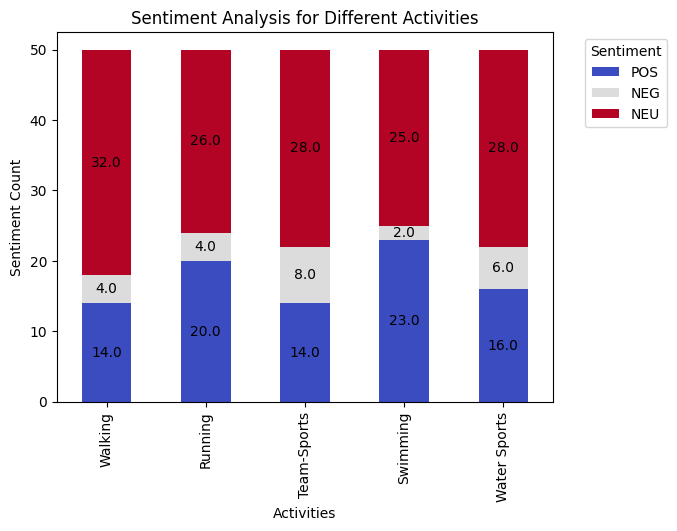

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer

# Read data from CSV file

# Define activities and corresponding columns
activities = ['Walking', 'Running', 'Team-Sports', 'Swimming', 'Water Sports']
sentiment_column = 'sentiment_pysentimiento'

# Create sentiment analyzer for Spanish
analyzer = create_analyzer(task="sentiment", lang="es")

# Initialize an empty dictionary to store sentiment results for each activity
sentiments_by_activity = {activity: {'POS': 0, 'NEG': 0, 'NEU': 0} for activity in activities}

# Iterate through each row and analyze sentiments for each activity
for index, row in df.iterrows():
    text = row['text']
    for activity in activities:
        label = row[activity]
        prediction = analyzer.predict(text).output

        # Increment sentiment count for the corresponding activity and label
        sentiments_by_activity[activity][prediction] += label  # Assuming labels are 0 or 1

# Convert sentiment counts to DataFrame for easy plotting
df_sentiments = pd.DataFrame(sentiments_by_activity).T

# Plotting the results in a bar graph with labels
ax = df_sentiments.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Activities')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis for Different Activities')

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
new_df = pd.read_csv("sample_data/labeled_data.csv")

In [ ]:
new_df

,Unnamed: 0,text,clusters
0,0,Woman robbed while waiting for bus in Rego Par...,7
1,1,1696985903 https://t.co/W4dZyVY5uH Positively ...,11
2,2,There's always emo kids at the park (I'm emo k...,5
3,3,The Night Park of Fengqiao [Tang] Zhang Ji Men...,1
4,4,"""Liberty vs Manassas Park | 2023 Virginia High...",8
...,...,...,...
251449,251449,Dinas Dinlle Car Park Improvement\r\n\r\n📅Cyng...,2
251450,251450,Step into the pages of history at Colwall Park...,14
251451,251451,"Saltwell Park firework display date, timings a...",0
251452,251452,.@UPMCinIreland are running a Sports Medicine ...,14


In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Read data from CSV file
import pandas as pd
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

# Load your DataFrame (replace 'your_data.csv' with your actual file path)
# Assuming you have a DataFrame named 'sample_df' with a 'text' column containing tweets.

# Initialize the SentimentAnalyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="en")

# Define a function to perform sentiment analysis and add labels to the DataFrame
def analyze_sentiment(text):
    result = sentiment_analyzer.predict(preprocess_tweet(text))
    return result

# Apply sentiment analysis to each row in the DataFrame
new_df['sentiment_pysentimiento'] = new_df['text'].apply(analyze_sentiment)

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('labeled_data_pysentimiento.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

# Load your DataFrame (replace 'your_data.csv' with your actual file path)
# Assuming you have a DataFrame named 'df' with a 'text' column containing tweets and a 'clusters' column.

# Define the sentiment analyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="en")

# Define cluster labels mapping
cluster_labels = {
    0: "Join Community",
    1: "Banking",
    2: "Local Involvement",
    3: "Picnic Planning",
    4: "Play Basketball",
    5: "National Service",
    6: "Road Travel",
    7: "World Tour",
    8: "Watch Game",
    9: "Nature Exploration",
    10: "Fire Alert",
    11: "Seasonal Events",
    12: "House Searching",
    13: "Fetching Ball",
    14: "Morning Activities"
}

# Apply sentiment analysis to each row in the DataFrame
new_df['sentiment_pysentimiento'] = new_df['text'].apply(lambda x: sentiment_analyzer.predict(preprocess_tweet(x)).output)

# Group by clusters and sentiment, then count occurrences
grouped_df = df.groupby(['clusters', 'sentiment_pysentimiento']).size().reset_index(name='count')

# Pivot the DataFrame for easy plotting
pivot_df = grouped_df.pivot(index='clusters', columns='sentiment_pysentimiento', values='count').fillna(0)

# Plotting the results in a bar graph
pivot_df.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Clusters')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis by Cluster')
plt.xticks(range(len(cluster_labels)), [cluster_labels[i] for i in range(len(cluster_labels))], rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyboardInterrupt: ignored